In [38]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
import shap

random.seed(10)

In [4]:
ASV_combine_ab = pd.read_csv("20230731_key_taxa_meth_ab.csv")       #this relative abundance had been transformed to percentage
ASV_combine_ab = ASV_combine_ab.set_index('Genus')
ASV_combine_ab = ASV_combine_ab.T
# ASV_combine_ab.info()
ASV_combine_ab.tail(10)

Genus,Acidovorax,Aestuariimonas,Alkalimarinus,Anaerobiospirillum,Blastocatella,Curvibacter,Cystobacteraceae,Desulfonatronobacter,Elstera,Erysipelotrichaceae_incertae_sedis,...,Methanogenium,Methanolinea,Methanomethylovorans,Methanoregula,Methanosarcina,Methanosphaera,Methanosphaerula,Methanospirillum,Methanothermobacter,Methanothrix
MG15,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,...,0.119485,7.954255,0.000000,0.000000,0.000000,0.085346,0.000000,36.656141,0.0,2.022702
AM01,0.0,0.0,0.0,0.0,0.0,0.000000,0.063827,0.0,0.0,0.00000,...,0.000000,7.147568,0.211754,0.000000,0.763703,17.433263,8.584719,0.159683,0.0,39.327247
AM02,0.0,0.0,0.0,0.0,0.0,0.000000,0.003461,0.0,0.0,0.00000,...,0.000000,6.346495,0.273261,0.478207,1.263834,20.043722,5.854625,2.882908,0.0,25.420139
AM03,0.0,0.0,0.0,0.0,0.0,0.000000,0.020339,0.0,0.0,0.00000,...,0.000000,6.468902,0.000000,0.000000,2.910383,11.604138,4.163031,4.966970,0.0,37.031036
AM04,0.0,0.0,0.0,0.0,0.0,0.000000,0.045878,0.0,0.0,0.01496,...,0.000000,8.243469,0.000000,0.318955,0.189854,26.993469,0.174666,0.000000,0.0,34.906592
AM05,0.0,0.0,0.0,0.0,0.0,0.054778,0.043169,0.0,0.0,0.00000,...,0.000000,9.231111,0.000000,0.000000,1.038037,12.552829,0.000000,4.448728,0.0,28.538593
AM06,0.0,0.0,0.0,0.0,0.0,0.000000,0.052093,0.0,0.0,0.00000,...,0.000000,11.424222,0.000000,0.000000,1.030405,8.274462,0.503493,2.478436,0.0,41.992896
AM07,0.0,0.0,0.0,0.0,0.0,0.000000,0.032014,0.0,0.0,0.00000,...,0.000000,11.436512,0.399514,0.799027,0.653118,3.710266,0.538475,0.291819,0.0,48.698975
AM08,0.0,0.0,0.0,0.0,0.0,0.000000,0.043108,0.0,0.0,0.00000,...,0.000000,4.347467,0.043997,0.000000,0.000000,1.589397,0.668207,0.137491,0.0,24.198427
AM09,0.0,0.0,0.0,0.0,0.0,0.000000,0.035531,0.0,0.0,0.00000,...,0.000000,7.284768,0.000000,0.000000,0.000000,2.440582,0.611826,0.117659,0.0,17.534541


In [5]:
Oper_group = pd.read_csv("ML_operation_group.csv")      

#Oper_group.info()

Oper_group_sub = Oper_group[Oper_group['Microbial sample'].isin(ASV_combine_ab.index)]
Oper_group_sub

Not_used_columns1 = ['Substrate1','Sub_weight1','Substrate2','Sub_weight2',
               'Sample name']

Target_name = "Methanogenesis efficiency"

# this table is used to correlate the operational parameters with microbial sample to methane yield
Oper_group_temp1 = Oper_group_sub.drop(columns = Not_used_columns1,axis=1) 
Oper_group_temp1 = Oper_group_temp1.set_index('Microbial sample')
# Oper_group_temp1

Oper_group_temp2 = Oper_group_temp1.reindex(ASV_combine_ab.index)
# Oper_group_temp2

Target = Oper_group_temp2[Target_name]
# Target

In [6]:
Target=Target.reset_index(drop=True)

In [7]:
ASV_combine_ab_temp1 = ASV_combine_ab
# ASV_combine_ab_temp1['VSS']= Oper_group_temp2['VSS'].values

In [8]:
ASV_combine_ab_temp1=ASV_combine_ab_temp1.reset_index(drop=True)

In [9]:
ASV_combine_ab_temp1

Genus,Acidovorax,Aestuariimonas,Alkalimarinus,Anaerobiospirillum,Blastocatella,Curvibacter,Cystobacteraceae,Desulfonatronobacter,Elstera,Erysipelotrichaceae_incertae_sedis,...,Methanogenium,Methanolinea,Methanomethylovorans,Methanoregula,Methanosarcina,Methanosphaera,Methanosphaerula,Methanospirillum,Methanothermobacter,Methanothrix
0,1.008394,0.010466,0.0,0.005756,0.0,0.256416,0.003663,0.0,0.000000,0.000000,...,0.0,8.565835,0.000000,0.000000,0.000000,34.654919,0.000000,3.964758,0.0,30.983847
1,0.648243,0.000000,0.0,0.021974,0.0,0.230207,0.070632,0.0,0.001046,0.000000,...,0.0,14.273262,0.000000,0.000000,0.000000,14.447592,3.421225,1.481804,0.0,28.829810
2,0.058173,0.000000,0.0,0.000000,0.0,0.000000,0.021952,0.0,0.000000,0.005488,...,0.0,3.010975,0.000000,0.000000,3.850412,10.087169,0.000000,15.495488,0.0,60.558940
3,0.118381,0.000000,0.0,0.000000,0.0,0.000000,0.019857,0.0,0.000000,0.000000,...,0.0,1.668345,0.000000,0.000000,4.219658,15.171559,0.000000,21.355433,0.0,46.557199
4,0.213140,0.000000,0.0,0.000000,0.0,0.000000,0.077006,0.0,0.000000,0.000000,...,0.0,1.918532,0.000000,0.000000,2.015849,1.570972,0.667315,25.441401,0.0,57.236202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.000000,0.0,0.000000,0.0,0.054778,0.043169,0.0,0.000000,0.000000,...,0.0,9.231111,0.000000,0.000000,1.038037,12.552829,0.000000,4.448728,0.0,28.538593
97,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.052093,0.0,0.000000,0.000000,...,0.0,11.424222,0.000000,0.000000,1.030405,8.274462,0.503493,2.478436,0.0,41.992896
98,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032014,0.0,0.000000,0.000000,...,0.0,11.436512,0.399514,0.799027,0.653118,3.710266,0.538475,0.291819,0.0,48.698975
99,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.043108,0.0,0.000000,0.000000,...,0.0,4.347467,0.043997,0.000000,0.000000,1.589397,0.668207,0.137491,0.0,24.198427


#### define model and split

In [10]:
# this is the model composing for XGBRegressor and hyperparameter range

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

Regressor = XGBRegressor(random_state=42)

from sklearn import set_config
# To get a diagram visualization of the pipeline
set_config(display="diagram")
Regressor

# To show the hyperparameters to be tuned
#for parameter in Regressor.get_params():
    #print(parameter)
    
# To make the distribution space of hyperparameters
from scipy.stats import loguniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

param_distributions = {
    #'regressor__reg_alpha': loguniform(1e-6, 1e3),
    #'regressor__reg_lambda': loguniform(1e-6, 1e3),
    'min_child_weight':[0, 1, 2, 5, 10, 20, 50, 100],
    'learning_rate': [0.0001,0.001, 0.1, 0.3, 0.5],
    #'regressor__max_leaves': loguniform_int(2, 256),
    'max_depth': [2, 6, 9],
    #'regressor__min_samples_leaf': loguniform_int(1, 100),
    #'regressor__max_bin': loguniform_int(2, 255),
    #'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500, 800],
    #'regressor__subsample':[0.2, 0.8, 1.0],
    'gamma':loguniform(1e-6, 5),
}

In [16]:
# this is the model composing for LGBMRegressor and hyperparameter range

from lightgbm import LGBMRegressor

Regressor = LGBMRegressor(random_state=42, use_missing = True)

from sklearn import set_config
# To get a diagram visualization of the pipeline
set_config(display="diagram")
Regressor

# To get the hyperparameters to be tuned
# for parameter in Regressor.get_params(): 
#     print(parameter)
    
# To make the distribution space of hyperparameters
from scipy.stats import loguniform

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

param_distributions = {
    #'regressor__reg_alpha': loguniform(1e-6, 1e3),
    #'regressor__reg_lambda': loguniform(1e-6, 1e3),
    'num_leaves':stats.randint(1, 600),
    'learning_rate': [0.0001,0.001, 0.1, 0.3, 0.5],
    #'regressor__max_leaves': loguniform_int(2, 256),
    'max_depth': loguniform_int(1, 501),
    #'min_child_weight': stats.uniform(1e-6, 1e-2),
    'min_child_samples': loguniform_int(2, 100),
    #'regressor__max_bin': loguniform_int(2, 255),
    #'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500, 800],
    #'regressor__subsample':[0.2, 0.8, 1.0],
    #'gamma':loguniform(1e-6, 5),
}

In [22]:
# this is the model composing for RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

Regressor = RandomForestRegressor(
            random_state=42, n_jobs=3)


from sklearn import set_config
# To get a diagram visualization of the pipeline
set_config(display="diagram")
Regressor

# this is the hyperparameter tuning for RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from scipy.stats import randint 
from sklearn.model_selection import KFold

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500, 800],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 75, 100, 150, 200],
    'max_depth': [1, 2, 5, 10, 20, 50, 100, 200],
    #'regressor__n_estimators': randint(1, 800),
    #'regressor__max_depth': randint(1, 50),
    #'regressor__min_samples_split': randint(1, 20),
    #'regressor__min_samples_leaf': randint(1, 100),
    #'regressor__max_features': randint(1, 50),
    #'regressor__max_leaf_nodes': randint(1, 200),
    'bootstrap': [True, False]
}

In [28]:
# this is the model composing for SVR

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

Regressor = SVR()

from sklearn import set_config
# To get a diagram visualization of the pipeline
set_config(display="diagram")
Regressor

# this is the hyperparameter tuning for SVR

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.model_selection import KFold

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

param_distributions = {
    'C': [1, 10, 50, 70, 80, 90, 100, 500, 1000],
    'gamma': [0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    # 'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],    #rbf is the best
}


In [34]:
# this is the model composing for MLP

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

Regressor = MLPRegressor(random_state=42, max_iter=500)

from sklearn import set_config
# To get a diagram visualization of the pipeline
set_config(display="diagram")
Regressor

# this is the hyperparameter tuning for MLP

class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

param_distributions = {
    #'regressor__max_iter':[100000, 1000000],
    'hidden_layer_sizes': [(50,),(100,), (200,)],
    #'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

In [11]:
from sklearn.model_selection import RandomizedSearchCV

### the inner_cv is used to cross validate the each dataframe in Total_train
from sklearn.model_selection import GroupShuffleSplit,ShuffleSplit

inner_cv = ShuffleSplit(n_splits=5, train_size=.8, random_state=42)

search_cv = RandomizedSearchCV(
    Regressor, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2, cv=inner_cv     #here the cv is the inner cross validation
)

search_cv

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_iter=20, n_jobs=2,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ac1e160>,
                                        'learning_rate': [0.0001, 0.001, 0.1,
                                                          0.3, 0.5],
                                        'max_depth': [2, 6, 9],
                                        'min_child_weight': [0, 1, 2, 5, 10, 20,
                                                             50, 100]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, RepeatedStratifiedKFold

S_group = Oper_group_temp2['Group']
S_group

RSKf_gen = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=0)
SSS_gen = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

RS_split = RSKf_gen.split(ASV_combine_ab_temp1, S_group)

# outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)
# outer_cv_1 = KFold(n_splits=5, shuffle=True, random_state=10)

scoring = ['neg_mean_absolute_error', 'r2']

cv_results = cross_validate(
    search_cv, ASV_combine_ab_temp1, Target, cv=RS_split, n_jobs=2, return_estimator=True, scoring=scoring)     #here the cv is the outer cross validation

In [13]:
cv_results_test = pd.DataFrame(cv_results)
cv_results_test

,fit_time,score_time,estimator,test_neg_mean_absolute_error,test_r2
0,3.033977,0.001356,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-9.784828,0.584635
1,3.003060,0.001292,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-9.186561,0.674734
2,3.244990,0.001378,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-10.181550,0.704072
3,3.196258,0.001182,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-10.819978,0.637686
4,3.238707,0.001321,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-12.131899,0.622565
5,3.190025,0.001243,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-7.366786,0.724277
6,3.242746,0.001277,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-10.269690,0.601974
7,3.225634,0.001490,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-11.353430,0.519308
8,3.247389,0.001231,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-9.435669,0.810388
9,3.254218,0.001308,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-11.700311,0.612599


In [14]:
for cv_fold, estimator_in_fold in enumerate(cv_results_test["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'gamma': 0.023606019021620996, 'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 10}
Best hyperparameters for fold #2:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #3:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #4:
{'gamma': 0.023606019021620996, 'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 10}
Best hyperparameters for fold #5:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #6:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #7:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #8:
{'gamma': 0.023606019021620996, 'learning_rate': 0.5, 'max_depth': 2, 'mi

In [39]:
# cv_MAE_df = pd.DataFrame(-cv_results_test['test_neg_mean_absolute_error']) #first time to create the dataframe
# cv_r2_df = pd.DataFrame(cv_results_test['test_r2'])

# cv_MAE_df = cv_MAE_df.rename(columns={"test_neg_mean_absolute_error":"XGB"})    #here the regressor name will be updated
# cv_r2_df = cv_r2_df.rename(columns={"test_r2":"XGB"})    #here the regressor name will be updated

cv_MAE_df['MLP']= -(cv_results_test['test_neg_mean_absolute_error'].values)
cv_r2_df['MLP']= cv_results_test['test_r2'].values

# Maximum iterations (500) reached and the optimization hasn't converged yet
cv_MAE_df

,XGB,LGB,RF,SVR,MLP
0,9.784828,9.237245,13.869797,14.970869,13.958320
1,9.186561,10.077096,10.776786,20.388747,11.944025
2,10.181550,8.467482,8.368542,18.973210,13.108286
3,10.819978,10.764568,13.116854,17.849951,16.375461
4,12.131899,12.649584,10.911810,15.955363,12.649611
5,7.366786,9.022788,9.628707,17.702750,12.965868
6,10.269690,14.805725,13.047950,16.875987,12.206065
7,11.353430,10.224789,8.149105,13.920709,13.693901
8,9.435669,10.652966,9.753809,16.746093,11.718095
9,11.700311,11.057972,10.032648,17.858239,15.569371


In [40]:
cv_r2_df

,XGB,LGB,RF,SVR,MLP
0,0.584635,0.683597,0.418893,0.270018,0.255691
1,0.674734,0.655425,0.627411,0.245694,0.582932
2,0.704072,0.742283,0.834051,0.313742,0.482951
3,0.637686,0.629469,0.536995,0.307845,0.290815
4,0.622565,0.599013,0.718616,0.411967,0.544983
5,0.724277,0.719766,0.686281,0.247098,0.548064
6,0.601974,0.369564,0.513754,0.280850,0.505231
7,0.519308,0.542522,0.799395,0.444287,0.418633
8,0.810388,0.728656,0.800909,0.397515,0.664097
9,0.612599,0.636671,0.665428,0.339234,0.381971


In [15]:
Train = [pd.DataFrame() for df in range(10)]     
Test = [pd.DataFrame() for df in range(10)]
for idx, split_index in enumerate(RSKf_gen.split(ASV_combine_ab_temp1, S_group)):
    # print("Split_count:", idx, "TRAIN:", split_index[0], "TEST:", split_index[1])
    Train[idx] = ASV_combine_ab_temp1.loc[split_index[0]]
    Test[idx]= ASV_combine_ab_temp1.loc[split_index[1]]

i = cv_results_test['test_r2'].idxmax()
        
Target_tune_para = Target.loc[Train[i].index]

search_cv.fit(X = Train[i], y = Target_tune_para)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_iter=20, n_jobs=2,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ac1e160>,
                                        'learning_rate': [0.0001, 0.001, 0.1,
                                                          0.3, 0.5],
                                        'max_depth': [2, 6, 9],
                                        'min_child_weight': [0, 1, 2, 5, 10, 20,
                                                             50, 100]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [16]:
search_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2257039971631841, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42, ...)

In [17]:
from sklearn.model_selection import cross_val_predict

SKf_gen = StratifiedKFold(n_splits=5, shuffle=True,random_state=0)
S_split = SKf_gen.split(ASV_combine_ab_temp1, S_group)
Target_pred = cross_val_predict(search_cv.best_estimator_, ASV_combine_ab_temp1, Target, cv=S_split)
# Target_pred

from sklearn.metrics import mean_absolute_error
#target_predicted = Tuned_model.predict(data_test)
print(f"Mean absolute error: "
      f"{mean_absolute_error(Target, Target_pred):.3f}")
MAE=mean_absolute_error(Target, Target_pred)

from sklearn.metrics import r2_score
print(f"r^2_score: "
      f"{r2_score(Target, Target_pred):.3f}")
R2_score=r2_score(Target, Target_pred)

from sklearn.metrics import mean_squared_error
print(f"Root mean squared error on the training set: "
      f"{mean_squared_error(Target, Target_pred, squared=False):.3f}")
RMSE=mean_squared_error(Target, Target_pred, squared=False)

Mean absolute error: 10.559
r^2_score: 0.669
Root mean squared error on the training set: 14.266


In [111]:
# Prediction_comparison = pd.DataFrame() # first time record data run this line to create dataframe
Prediction_comparison['XGB']= Target_pred

In [112]:
Prediction_comparison

,XGB
0,42.745869
1,51.417065
2,45.204018
3,50.942982
4,49.258884
...,...
96,76.157463
97,67.380051
98,79.161758
99,67.730438


In [148]:
# # columns = ['Algorithm', 'MAE', 'R2', 'RMSE']    #run these two lines for the first time
# # Prediction_metrics = pd.DataFrame(columns=columns)

# row = ['SVR', MAE, R2_score, RMSE]  #manually updata algorithm name
# Prediction_metrics.loc[4]= row  #manually updata loc number
# Prediction_metrics

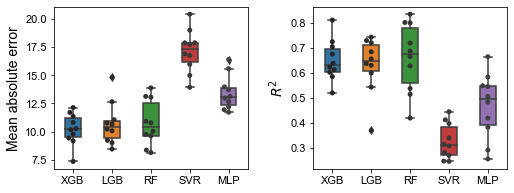

In [101]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

# fig, ax = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(9, 3,forward=True)
fig = plt.figure(figsize=(9, 3))

# ax1 = plt.subplot(1,2,1)
ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.75])
#MAE_plot = sns.boxplot(data=cv_test_error_df).set(ylabel='MAE')
#MAE_plot = sns.swarmplot(data=cv_test_error_df,color=".25")
ax1.tick_params(axis='x', labelsize=11)
ax1.tick_params(axis='y', labelsize=11)
MAE_plot = sns.boxplot(data=cv_MAE_df,width=0.4).set(ylabel='Mean absolute error')
MAE_plot = sns.swarmplot(data=cv_MAE_df,palette='dark:.25')

# ax2 = plt.subplot(1,2,2)
ax2 = fig.add_axes([0.5, 0.1, 0.3, 0.75])
#MAE_plot = sns.boxplot(data=cv_test_error_df).set(ylabel='MAE')
#MAE_plot = sns.swarmplot(data=cv_test_error_df,color=".25")
ax2.tick_params(axis='x', labelsize=11)
ax2.tick_params(axis='y', labelsize=11)
MAE_plot = sns.boxplot(data=cv_r2_df,width=0.4).set(ylabel='$R^2$')
MAE_plot = sns.swarmplot(data=cv_r2_df,palette='dark:.25')

plt.savefig('Microbial_model_compare.pdf')

### XGB was selected because of the smallest MAE and good R2

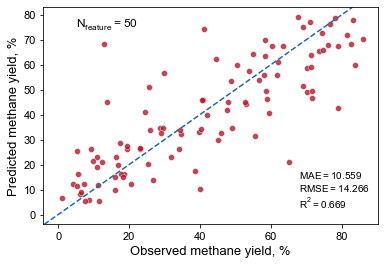

In [208]:
Target_ob_pre = pd.DataFrame({'Observed':Target, 'Predicted':Prediction_comparison['XGB'].values})

import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'regular'

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

# fig, ax = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(10, 4,forward=True)

# ax = plt.subplot(1,2,1)
ax = sns.scatterplot(data=Target_ob_pre,
                x="Observed", y="Predicted",
                color="#b2182b", alpha=0.8)

MAE=mean_absolute_error(Target_ob_pre['Observed'], Target_ob_pre['Predicted'])
R2_score=r2_score(Target_ob_pre['Observed'], Target_ob_pre['Predicted'])
RMSE=mean_squared_error(Target_ob_pre['Observed'], Target_ob_pre['Predicted'], squared=False)

tex = f'$MAE = {MAE:.3f}$\n$RMSE = {RMSE:.3f}$\n$R^2 = {R2_score:.3f}$'.format(MAE,R2_score,RMSE)

ax.text(68, 18, tex, fontsize=10,
        verticalalignment='top')
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.axline((0, 0), slope=1, linestyle = '--', color = '#2166ac', alpha=1)
ax.set_xlabel("Observed methane yield, %",fontsize=13)
ax.set_ylabel("Predicted methane yield, %",fontsize=13)
ax.text(5,75,'$N _{feature}=50$',fontsize=12,font='Arial')
#ax.axis('square')
plt.savefig('Predict_observed_microbial_all.pdf')

#### run the selected model to calculate sharpley value

In [19]:
# fit model for sharpley
import shap
Fit_reg = search_cv.best_estimator_.fit(ASV_combine_ab_temp1, Target)
explainer = shap.Explainer(Fit_reg)
shap_values_all = explainer(ASV_combine_ab_temp1)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Sharpea'),
  Text(0, 1, 'Anaerobiospirillum'),
  Text(0, 2, 'Elstera'),
  Text(0, 3, 'Aestuariimonas'),
  Text(0, 4, 'Desulfonatronobacter'),
  Text(0, 5, 'Alkalimarinus'),
  Text(0, 6, 'Methanoregula'),
  Text(0, 7, 'Erysipelotrichaceae_incertae_sedis'),
  Text(0, 8, 'Paraburkholderia'),
  Text(0, 9, 'Parvibaculum'),
  Text(0, 10, 'Streptobacillus'),
  Text(0, 11, 'Methanocorpusculum'),
  Text(0, 12, 'Blastocatella'),
  Text(0, 13, 'Mycobacterium'),
  Text(0, 14, 'Methanosarcina'),
  Text(0, 15, 'Ilyomonas'),
  Text(0, 16, 'Sulfuritalea'),
  Text(0, 17, 'Curvibacter'),
  Text(0, 18, 'Methanosphaerula'),
  Text(0, 19, 'Methanogenium'),
  Text(0, 20, 'Puia'),
  Text(0, 21, 'Cystobacteraceae'),
  Text(0, 22, 'Acidovorax'),
  Text(0, 23, 'Methanomethylovorans'),
  Text(0, 24, 'Methanothrix'),

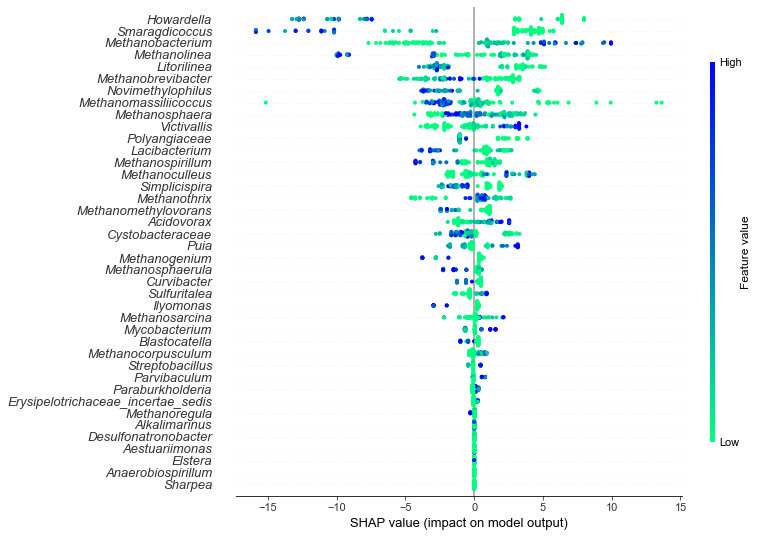

In [206]:
shap.summary_plot(shap_values_all, ASV_combine_ab_temp1, max_display=40, plot_size=[10,9],show=False, 
                  cmap="winter_r",color_bar=True)
plt.gcf().axes[-1].set_aspect(70)
plt.gcf().axes[-1].set_box_aspect(90)
plt.yticks(style="italic")
# plt.savefig('sharpley_beeswarm_all_microbial.pdf',bbox_inches='tight')

### feature reduction for microbial data

In [20]:
#this is used to remove the least important features (the last one of the features sorted by sharpley importance)

value_list =  np.abs(shap_values_all.values).mean(0)
#value_list
features = ASV_combine_ab_temp1.columns
#features
shap_feature_importance = pd.DataFrame(list(zip(features, value_list)),
                                 columns=['feature_name','shap_importance_vals'])
shap_feature_importance.sort_values(by=['shap_importance_vals'],
                              ascending=False, inplace=True)
#shap_feature_importance.info()
sel_features = list(shap_feature_importance.feature_name[:-1])
#sel_features

In [22]:
Num_features = len(ASV_combine_ab_temp1.columns)
R2_test_mean = cv_results_test["test_r2"].mean()
R2_test_std = cv_results_test["test_r2"].std()
MAE_test_mean = (-cv_results_test["test_neg_mean_absolute_error"]).mean()
MAE_test_std = (-cv_results_test["test_neg_mean_absolute_error"]).std()
row = [Num_features, R2_test_mean, R2_test_std, MAE_test_mean, MAE_test_std]

columns = ['Num_features', 'R2_test_mean', 'R2_test_std', 'MAE_test_mean', 'MAE_test_std']
Prediction_stats = pd.DataFrame(columns=columns)
Prediction_stats.loc[Num_features] = row

Feature_list=[]

In [23]:
Prediction_stats

,Num_features,R2_test_mean,R2_test_std,MAE_test_mean,MAE_test_std
50,50.0,0.649224,0.082147,10.22307,1.394774


In [24]:
uncalled = True

for j in range(len(ASV_combine_ab_temp1.columns)-3):
    RS_split = RSKf_gen.split(ASV_combine_ab_temp1[sel_features], S_group)
    # S_split = SKf_gen.split(ASV_combine_ab_temp1[sel_features], S_group)
    scoring = ['neg_mean_absolute_error', 'r2']
    cv_results = cross_validate(
    search_cv, ASV_combine_ab_temp1[sel_features], Target, cv=RS_split, n_jobs=2, return_estimator=True, scoring=scoring)  #here the cv is the outer cross validation

    cv_results_redu = pd.DataFrame(cv_results)
    cv_results_redu

    Num_features = len(ASV_combine_ab_temp1[sel_features].columns)
    R2_test_mean = cv_results_redu["test_r2"].mean()
    R2_test_std = cv_results_redu["test_r2"].std()
    MAE_test_mean = (-cv_results_redu["test_neg_mean_absolute_error"]).mean()
    MAE_test_std = (-cv_results_redu["test_neg_mean_absolute_error"]).std()
    row = [Num_features, R2_test_mean, R2_test_std, MAE_test_mean, MAE_test_std]

    Prediction_stats.loc[Num_features] = row
    # Prediction_stats

    i = cv_results_redu['test_r2'].idxmax()

    Train = [pd.DataFrame() for df in range(10)]
    Test = [pd.DataFrame() for df in range(10)]
    for idx, split_index in enumerate(RSKf_gen.split(ASV_combine_ab_temp1[sel_features], S_group)):
            # print("Split_count:", idx, "TRAIN:", split_index[0], "TEST:", split_index[1])
            Train[idx] = ASV_combine_ab_temp1[sel_features].loc[split_index[0]]
            Test[idx]= ASV_combine_ab_temp1[sel_features].loc[split_index[1]]

    Target_tune_para = Target.loc[Train[i].index]

    search_cv.fit(X = Train[i], y = Target_tune_para)

    best_model = search_cv.best_estimator_.fit(ASV_combine_ab_temp1[sel_features], Target)
    explainer = shap.Explainer(best_model)
    shap_values = explainer(ASV_combine_ab_temp1[sel_features])

    value_list =  np.abs(shap_values.values).mean(0)
    features = ASV_combine_ab_temp1[sel_features].columns
    Feature_list.append(features)
    shap_feature_importance = pd.DataFrame(list(zip(features, value_list)),
                                     columns=['feature_name','shap_importance_vals'])
    shap_feature_importance.sort_values(by=['shap_importance_vals'],
                                  ascending=False, inplace=True)
    sel_features = list(shap_feature_importance.feature_name[:-1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated

In [20]:
Prediction_stats

,Num_features,R2_test_mean,R2_test_std,MAE_test_mean,MAE_test_std
50,50.0,0.649224,0.082147,10.223070,1.394774
49,49.0,0.651060,0.084980,10.219674,1.299667
48,48.0,0.647038,0.080999,10.353033,1.057655
47,47.0,0.649656,0.095577,10.135861,1.272854
46,46.0,0.649656,0.095577,10.135861,1.272854
45,45.0,0.649656,0.095577,10.135861,1.272854
44,44.0,0.640155,0.081560,10.306455,1.217940
43,43.0,0.652300,0.061599,10.117523,1.123947
42,42.0,0.637754,0.081641,10.371738,1.146222
41,41.0,0.652421,0.092291,10.408814,1.417468


In [25]:
Feature_list[39]

Index(['Howardella', 'Smaragdicoccus', 'Methanolinea', 'Methanobrevibacter',
       'Methanomassiliicoccus', 'Litorilinea', 'Methanosphaera',
       'Methanobacterium', 'Lacibacterium', 'Methanothrix'],
      dtype='object', name='Genus')

In [27]:
sel_feature = ['Howardella', 'Smaragdicoccus', 'Methanolinea', 'Methanobrevibacter',
               'Methanomassiliicoccus', 'Litorilinea', 'Methanosphaera',
               'Methanobacterium', 'Lacibacterium', 'Methanothrix']

In [163]:
x = np.array(Prediction_stats.Num_features)
y1 = np.array(Prediction_stats.R2_test_mean)
e1 = np.array(Prediction_stats.R2_test_std)

#x2 = np.array(Prediction_stats.Num_features)
y2 = np.array(Prediction_stats.MAE_test_mean)
e2 = np.array(Prediction_stats.MAE_test_std)

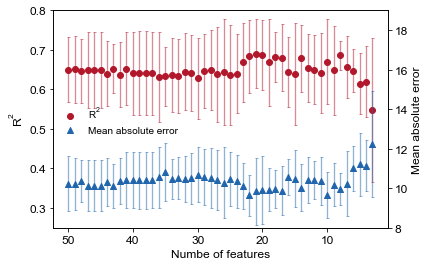

In [209]:
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib
#cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("bwr").colors[:5])


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

fig = plt.figure()

ax = fig.add_subplot(111)
plt.scatter(x, y1, color='#b2182b', alpha=1, label = '$R^2$')
plt.errorbar(x, y1, yerr=e1, color='#b2182b', linestyle="None",alpha=0.5, lw=1.3, capsize=1.5)

ax.invert_xaxis()
# ax.fill_between(x, y1-e1, y1+e1,
#                        alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848')
ax.set_xlabel('Numbe of features')
ax.set_ylabel('$R^2$')
ax.set_ylim([0.25, 0.8])

ax2 = ax.twinx()
ax2.scatter(x, y2, color='#2166ac',label = 'Mean absolute error', marker='^')
ax2.errorbar(x, y2, yerr=e2, color='#2166ac', linestyle="None", alpha=0.5, lw=1.3, capsize=1.5)

ax2.set_ylabel('Mean absolute error')
ax2.set_ylim([8, 19])
# ax.xlabel('Numbe of features')
# ax.ylabel('$R^2$')
fig.legend(loc="center left", bbox_to_anchor=(0.12, 0.5), frameon = False, fontsize = 10)
#plt.setp(plot.get_legend().get_texts(), fontsize='10')
#plt.show()
plt.savefig('Feature_number_stats_microbial.pdf')

### use the reduced profile to predict methane yield

In [22]:
ASV_combine_ab_reduc = ASV_combine_ab_temp1[Feature_list[39]]

In [28]:
ASV_combine_ab_reduc = ASV_combine_ab_temp1[sel_feature]

In [29]:
# RSKf_gen = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=0)
# SSS_gen = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

RS_split = RSKf_gen.split(ASV_combine_ab_reduc, S_group)

# outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)
# outer_cv_1 = KFold(n_splits=5, shuffle=True, random_state=10)

scoring = ['neg_mean_absolute_error', 'r2']

cv_results = cross_validate(
    search_cv, ASV_combine_ab_reduc, Target, cv=RS_split, n_jobs=2, return_estimator=True, scoring=scoring) 

In [30]:
cv_results_test = pd.DataFrame(cv_results)
cv_results_test

,fit_time,score_time,estimator,test_neg_mean_absolute_error,test_r2
0,2.585414,0.000897,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-11.370395,0.509571
1,2.605493,0.004143,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-8.851564,0.705580
2,2.307342,0.001668,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-10.489712,0.652078
3,2.282882,0.000838,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-10.392378,0.649622
4,2.296450,0.000955,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-9.490372,0.770117
5,2.255969,0.000861,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-8.283895,0.745604
6,2.540689,0.000917,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-8.340161,0.660070
7,2.553916,0.000947,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-11.085182,0.491385
8,3.049855,0.000878,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-8.374404,0.833699
9,3.093740,0.000939,"RandomizedSearchCV(cv=ShuffleSplit(n_splits=5,...",-9.717916,0.687696


In [31]:
for cv_fold, estimator_in_fold in enumerate(cv_results_test["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #2:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #3:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #4:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #5:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #6:
{'gamma': 0.2257039971631841, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}
Best hyperparameters for fold #7:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 10}
Best hyperparameters for fold #8:
{'gamma': 0.0008673180456691902, 'learning_rate': 0.5, 'max_depth': 9, 'min_chi

In [32]:
Train = [pd.DataFrame() for df in range(10)]     
Test = [pd.DataFrame() for df in range(10)]
for idx, split_index in enumerate(RSKf_gen.split(ASV_combine_ab_reduc, S_group)):
    # print("Split_count:", idx, "TRAIN:", split_index[0], "TEST:", split_index[1])
    Train[idx] = ASV_combine_ab_reduc.loc[split_index[0]]
    Test[idx]= ASV_combine_ab_reduc.loc[split_index[1]]

i = cv_results_test['test_r2'].idxmax()
        
Target_tune_para = Target.loc[Train[i].index]

search_cv.fit(X = Train[i], y = Target_tune_para)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.8),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_iter=20, n_jobs=2,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12ac1e160>,
                                        'learning_rate': [0.0001, 0.001, 0.1,
                                                          0.3, 0.5],
                                        'max_depth': [2, 6, 9],
                                        'min_child_weight': [0, 1, 2, 5, 10, 20,
                                                             50, 100]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [33]:
search_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.023606019021620996, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42, ...)

In [34]:
from sklearn.model_selection import cross_val_predict

SKf_gen = StratifiedKFold(n_splits=5, shuffle=True,random_state=0)
S_split = SKf_gen.split(ASV_combine_ab_reduc, S_group)
Target_pred = cross_val_predict(search_cv.best_estimator_, ASV_combine_ab_reduc, Target, cv=S_split)
# Target_pred

from sklearn.metrics import mean_absolute_error
#target_predicted = Tuned_model.predict(data_test)
print(f"Mean absolute error: "
      f"{mean_absolute_error(Target, Target_pred):.3f}")
MAE=mean_absolute_error(Target, Target_pred)

from sklearn.metrics import r2_score
print(f"r^2_score: "
      f"{r2_score(Target, Target_pred):.3f}")
R2_score=r2_score(Target, Target_pred)

from sklearn.metrics import mean_squared_error
print(f"Root mean squared error on the training set: "
      f"{mean_squared_error(Target, Target_pred, squared=False):.3f}")
RMSE=mean_squared_error(Target, Target_pred, squared=False)

Mean absolute error: 10.722
r^2_score: 0.678
Root mean squared error on the training set: 14.076


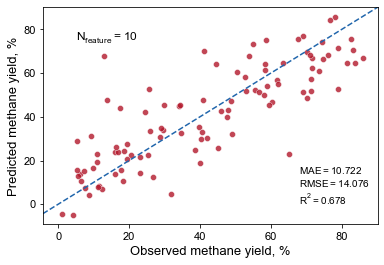

In [217]:
Target_ob_pre = pd.DataFrame({'Observed':Target, 'Predicted':Target_pred})

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'regular'

# fig, ax = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(10, 4,forward=True)

# ax = plt.subplot(1,2,1)
ax = sns.scatterplot(data=Target_ob_pre,
                x="Observed", y="Predicted",
                color="#b2182b", alpha=0.8)

MAE=mean_absolute_error(Target_ob_pre['Observed'], Target_ob_pre['Predicted'])
R2_score=r2_score(Target_ob_pre['Observed'], Target_ob_pre['Predicted'])
RMSE=mean_squared_error(Target_ob_pre['Observed'], Target_ob_pre['Predicted'], squared=False)

tex = f'$MAE = {MAE:.3f}$\n$RMSE = {RMSE:.3f}$\n$R^2 = {R2_score:.3f}$'.format(MAE,R2_score,RMSE)

ax.text(68, 18, tex, fontsize=10,
        verticalalignment='top')
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.axline((0, 0), slope=1, linestyle = '--', color = '#2166ac', alpha=1)
ax.set_xlabel("Observed methane yield, %",fontsize=13)
ax.set_ylabel("Predicted methane yield, %",fontsize=13)
ax.text(5,75,'$N _{feature}=10$',fontsize=12,font='Arial')
#ax.axis('square')
plt.savefig('Predict_observed_microbial_all_reduction.pdf')

In [35]:
Fit_reg = search_cv.best_estimator_.fit(ASV_combine_ab_reduc, Target)
explainer = shap.Explainer(Fit_reg)
shap_values_all = explainer(ASV_combine_ab_reduc)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Methanothrix'),
  Text(0, 1, 'Lacibacterium'),
  Text(0, 2, 'Litorilinea'),
  Text(0, 3, 'Methanobacterium'),
  Text(0, 4, 'Methanosphaera'),
  Text(0, 5, 'Methanomassiliicoccus'),
  Text(0, 6, 'Methanobrevibacter'),
  Text(0, 7, 'Methanolinea'),
  Text(0, 8, 'Smaragdicoccus'),
  Text(0, 9, 'Howardella')])

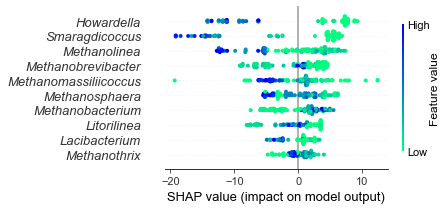

In [30]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'regular'

shap.summary_plot(shap_values_all, ASV_combine_ab_reduc, max_display=40, plot_size=[5,3],show=False, 
                  cmap="winter_r",color_bar=True)
plt.gcf().axes[-1].set_aspect(70)
plt.gcf().axes[-1].set_box_aspect(90)
plt.yticks(style="italic")
# plt.savefig('sharpley_beeswarm_all_microbial_reduction.pdf',bbox_inches='tight')

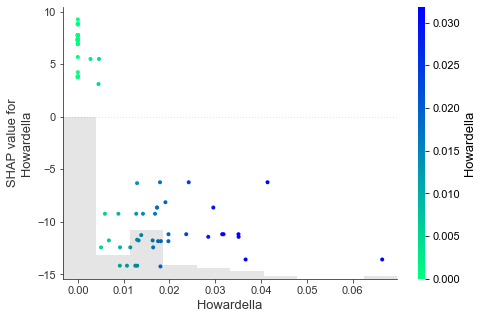

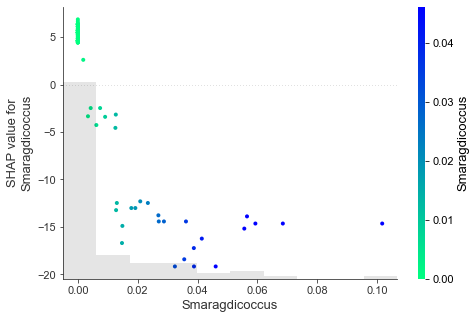

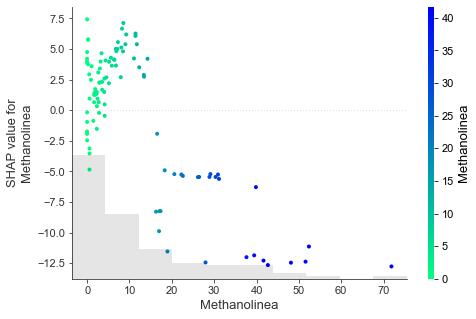

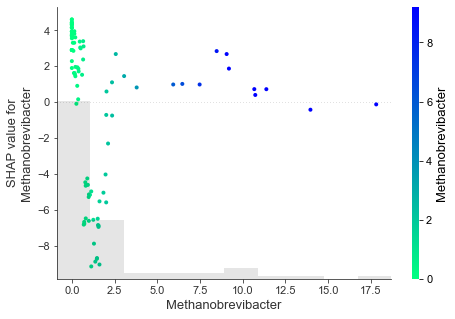

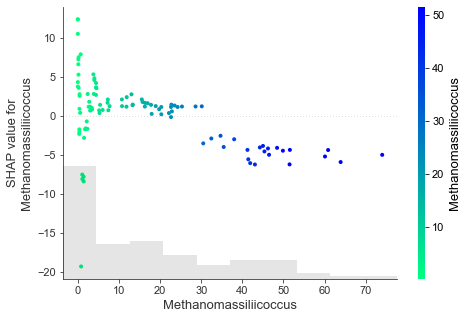

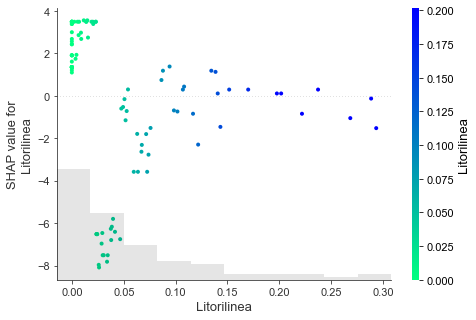

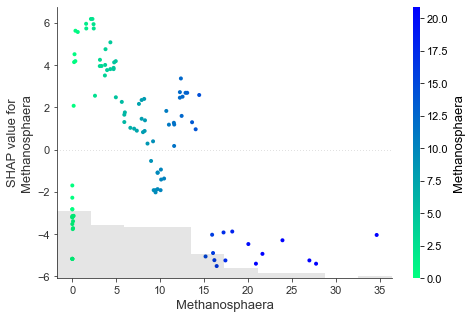

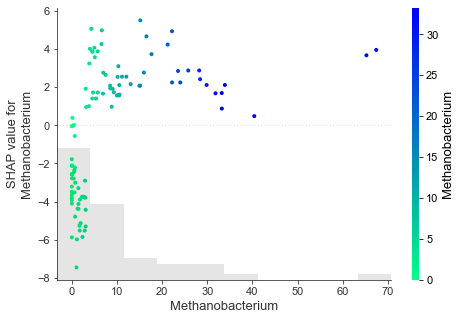

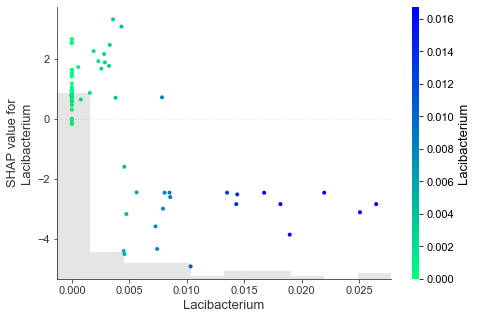

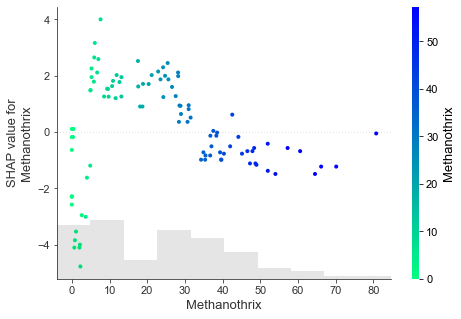

In [32]:
from matplotlib.backends.backend_pdf import PdfPages
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.it'] = 'Arial:italic'
pdf = PdfPages("./Effects_for_microbial_reduction_small_dataset.pdf")
for i in ASV_combine_ab_reduc:
    # shap.plots.scatter(shap_values_all[:,"Methanothrix"], color=shap_values_all[:,i], 
    #                    cmap="winter_r",show=False)
    shap.plots.scatter(shap_values_all[:,i], color=shap_values_all[:,i], 
                   cmap="winter_r",show=False)
    plt.gcf().axes[-2].set_aspect('auto')
    plt.gcf().axes[-2].set_box_aspect(40)
    pdf.savefig()
pdf.close()

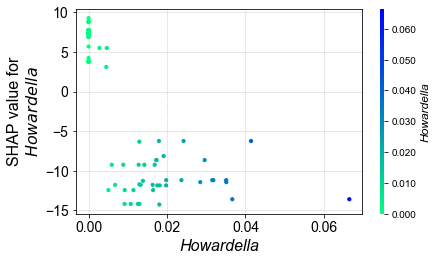

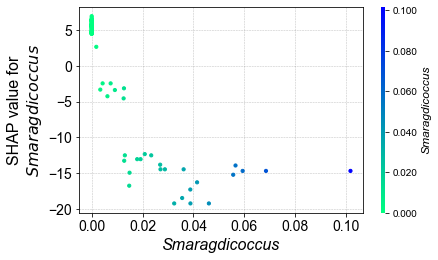

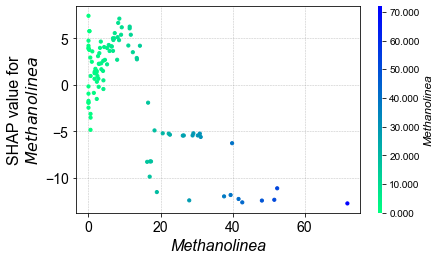

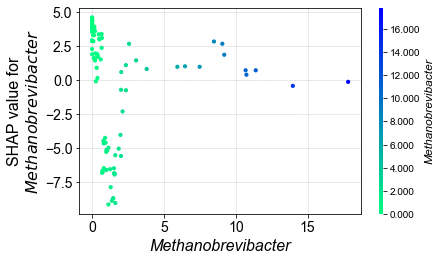

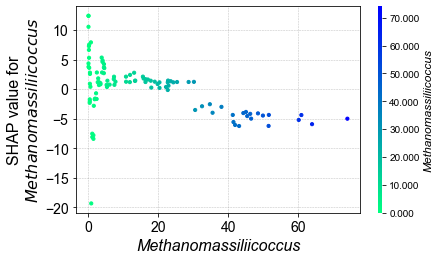

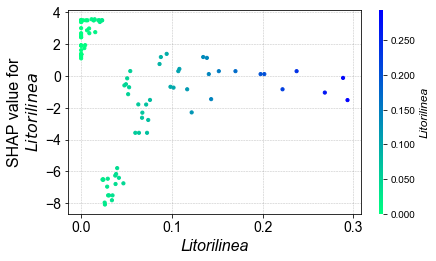

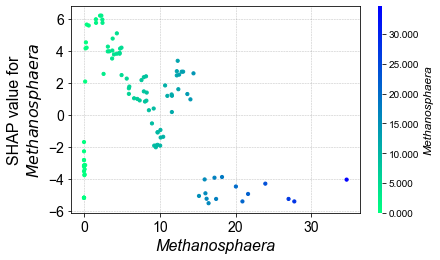

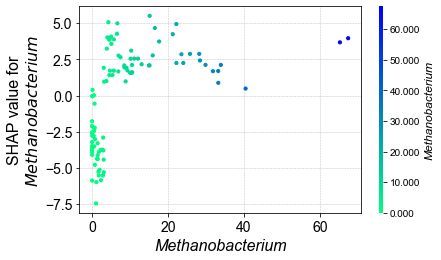

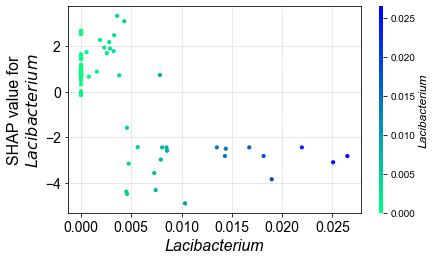

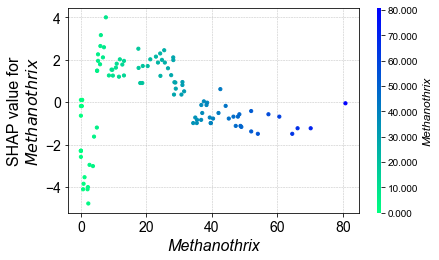

In [52]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)

pdf = PdfPages("./20241016_Effects_for_microbial_reduction_small_dataset.pdf")
for i in ASV_combine_ab_reduc:
    
    fig, ax = plt.subplots(tight_layout=True, figsize=(6.5, 4))

    # or you need more flexible customization
    scatter = ax.scatter(
        shap_values_all[:,i].data,
        shap_values_all[:,i].values,
        c=shap_values_all[:,i].data,
        # marker="^",
        cmap=plt.get_cmap("winter_r"),
        rasterized=True,
        zorder=5,
        s=10
    )

    cbar = plt.colorbar(scatter, aspect=50, format="%2.3f")
    cbar.set_label(i, fontsize=12, style= "italic")
    cbar.outline.set_visible(False)
    cbar.ax.tick_params(labelsize=10)

    # ax.set_title("Customization", fontsize=18)
    ax.set_xlabel(i, fontsize=16,style= "italic")
    ax.set_ylabel("SHAP value for\n"+f"${i}$", fontsize=16)

    ax.tick_params(labelsize=14)

    ax.grid(linestyle="--", color="gray", linewidth=0.5, zorder=0, alpha=0.5)
    pdf.savefig(bbox_inches = 'tight', dpi = 200)
pdf.close()